### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import os

In [58]:
demo = pd.read_sas("DEMO_I.XPT")
demo = demo.drop(columns=["SDDSRVYR","RIDSTATR","RIDAGEMN","RIDRETH1","RIDEXAGM","DMQADFC","DMDYRSUS",
                          "DMDEDUC3","RIDEXPRG","SDMVPSU","SDMVSTRA","DMDHSEDU","SIALANG","SIAPROXY",
                          "SIAINTRP","FIALANG","FIAPROXY","FIAINTRP","MIALANG","MIAPROXY","MIAINTRP",
                          "AIALANGA","WTMEC2YR"])
bpx = pd.read_sas("BPX_I.XPT")
bpx = bpx.loc[:,["SEQN","BPXPLS","BPXML1","BPXSY1","BPXDI1","BPXSY2","BPXDI2","BPXSY3","BPXDI3"]]
bmx = pd.read_sas("BMX_I.XPT")
bmx = bmx.loc[:,["SEQN","BMXWT","BMXHT","BMXBMI","BMXLEG","BMXARML","BMXARMC","BMXWAIST","BMDAVSAD"]]
hsq = pd.read_sas("HSQ_I.XPT")
hsq = hsq.loc[:,["SEQN","HSD010","HSQ500","HSQ510","HSQ520","HSQ590"]]

In [59]:
df = pd.merge(demo, hsq, left_on="SEQN",right_on="SEQN")
df = pd.merge(df, bpx, left_on="SEQN",right_on="SEQN")
df = pd.merge(df, bmx, left_on="SEQN",right_on="SEQN")
df = df.loc[df.RIDAGEYR>=20,]
df = df[np.isfinite(df["HSD010"])]
# df = df[pd.notnull(df['HSD010'])]
df.reset_index(drop=True, inplace=True)

### Resampling

In [27]:
## resampling
# import random
# ind=random.choices(range(df.shape[0]),weights=df["WTINT2YR"],k=df.shape[0])
# len(set(ind))

#df.loc[df.HSQ590.isin([7,9]),:]

4953

In [60]:
## replicate
ind=np.repeat(df.index,round(df["WTINT2YR"]/min(df["WTINT2YR"])))
df=df.iloc[ind,:]

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38952 entries, 0 to 4965
Data columns (total 45 columns):
SEQN        38952 non-null float64
RIAGENDR    38952 non-null float64
RIDAGEYR    38952 non-null float64
RIDRETH3    38952 non-null float64
RIDEXMON    38952 non-null float64
DMQMILIZ    38952 non-null float64
DMDBORN4    38952 non-null float64
DMDCITZN    38950 non-null float64
DMDEDUC2    38952 non-null float64
DMDMARTL    38952 non-null float64
DMDHHSIZ    38952 non-null float64
DMDFMSIZ    38952 non-null float64
DMDHHSZA    38952 non-null float64
DMDHHSZB    38952 non-null float64
DMDHHSZE    38952 non-null float64
DMDHRGND    38952 non-null float64
DMDHRAGE    38952 non-null float64
DMDHRBR4    37648 non-null float64
DMDHREDU    37648 non-null float64
DMDHRMAR    38914 non-null float64
WTINT2YR    38952 non-null float64
INDHHIN2    38125 non-null float64
INDFMIN2    38183 non-null float64
INDFMPIR    36086 non-null float64
HSD010      38952 non-null float64
HSQ500      38952

In [62]:
## categorical: little NA+dont know-drop, many NA-add indicator
df.RIAGENDR = df.RIAGENDR.replace({1:"Male", 2:"Female"})
df.RIDRETH3 = df.RIDRETH3.replace({1:"Mexican American", 2:"Other Hispanic", 3:"Non-Hispanic White", 4:"Non-Hispanic Black", 6:"Non-Hispanic Asian", 7:"Other Race"})
df.RIDEXMON = df.RIDEXMON.replace({1:"November 1 through April 30", 2:"May 1 through October 31"})
df.DMQMILIZ = df.DMQMILIZ.replace({1:"Yes", 2:"No"})
df = df.loc[df.DMDBORN4<7,]
df.DMDBORN4 = df.DMDBORN4.replace({1:"Born in 50 US states or Washington, DC", 2:"Others"})
df = df.loc[df.DMDCITZN<7,]
df.DMDCITZN = df.DMDCITZN.replace({1:"Citizen by birth or naturalization", 2:"Not a citizen of the US"})
df = df.loc[df.DMDEDUC2<7,]
df.DMDEDUC2 = df.DMDEDUC2.replace({1:"Less than 9th grade", 2:"9-11th grade (Includes 12th grade with no diploma)", 3:"High school graduate/GED or equivalent", 4:"Some college or AA degree", 5:"College graduate or above"})
df = df.loc[df.DMDMARTL<7,]
df.DMDMARTL = df.DMDMARTL.replace({1:"Married", 2:"Widowed", 3:"Divorced", 4:"Separated", 5:"Never married", 6:"Living with partner"})
df.DMDHRGND = df.DMDHRGND.replace({1:"Male", 2:"Female"})
df.DMDHRBR4 = df.DMDHRBR4.astype("object").replace([77,99], np.nan)
df.DMDHRBR4 = df.DMDHRBR4.replace({1:"Born in 50 US states or Washington, DC", 2:"Others"})
df.DMDHREDU=df.DMDHREDU.astype("object").replace([7,9], np.nan)
df.DMDHREDU = df.DMDHREDU.replace({1:"Less than 9th grade", 2:"9-11th grade (Includes 12th grade with no diploma)", 3:"High school graduate/GED or equivalent", 4:"Some college or AA degree", 5:"College graduate or above"})
df.DMDHRMAR=df.DMDHRMAR.astype("object").replace([77,99], np.nan)
df.DMDHRMAR = df.DMDHRMAR.replace({1:"Married", 2:"Widowed", 3:"Divorced", 4:"Separated", 5:"Never married", 6:"Living with partner"})
df.INDHHIN2 = df.INDHHIN2.astype("object").replace([77,99], np.nan)
df.INDFMIN2 = df.INDFMIN2.astype("object").replace([77,99], np.nan)
df.HSD010 = df.HSD010.replace({1:"Excellent", 2:"Very good", 3:"Good", 4:"Fair", 5:"Poor"})
df = df.loc[df.HSQ500<7,]
df.HSQ500 = df.HSQ500.replace({1:"Yes", 2:"No"})
df = df.loc[df.HSQ510<7,]
df.HSQ510 = df.HSQ510.replace({1:"Yes", 2:"No"})
df = df.loc[df.HSQ520<7,]
df.HSQ520 = df.HSQ520.replace({1:"Yes", 2:"No"})
df.HSQ590 = df.HSQ590.replace({1:"Yes", 2:"No"}).replace([7,9], np.nan)

In [73]:
df.shape

(38671, 45)

In [76]:
df1=df.loc[:,df.columns.isin(list(bpx.columns)+list(bmx.columns))]
df2=df.loc[:,df.columns.isin(list(demo.columns)+list(hsq.columns))]

In [77]:
df1.shape,df2.shape

((38671, 17), (38671, 29))

### clustering

In [84]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="mean",add_indicator=True)
df1= pd.DataFrame(imp.fit_transform(df1))

### classification

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df2.loc[:,df2.columns!="HSD010"],df2["HSD010"],random_state=0)
imp_cat=SimpleImputer(missing_values=np.nan, strategy="most_frequent",add_indicator=True)
imp_num=SimpleImputer(missing_values=np.nan, strategy="mean",add_indicator=True)
X_train=pd.concat([pd.DataFrame(imp_num.fit_transform(X_train.loc[:,X_train.dtypes!=object])),pd.DataFrame(imp_cat.fit_transform(X_train.loc[:,X_train.dtypes==object]))],axis=1)
X_test=pd.concat([pd.DataFrame(imp_num.transform(X_test.loc[:,X_test.dtypes!=object])),pd.DataFrame(imp_cat.transform(X_test.loc[:,X_test.dtypes==object]))],axis=1)
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X_train=pd.concat([X_train.select_dtypes(exclude='object'),pd.DataFrame(enc.fit_transform(X_train.select_dtypes(include='object')).toarray())], axis=1)
X_test=pd.concat([X_test.select_dtypes(exclude='object'),pd.DataFrame(enc.transform(X_test.select_dtypes(include='object')).toarray())], axis=1)

In [95]:
X_train.shape,X_test.shape

((29003, 73), (9668, 73))

### Clustering

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(df_cluster.iloc[:,1:])
avg = []
scores = []
for k in range(2,21):
    clusterer = KMeans(n_clusters=k, random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    avg.append(silhouette_score(X, cluster_labels))
    scores.append(-clusterer.score(X))

In [45]:
avg

[0.25859591069236326,
 0.19469038508373393,
 0.199828519990707,
 0.2077390116449113,
 0.18116966691142203,
 0.17677583204824887,
 0.1602105941475751,
 0.15726842327855126,
 0.15797858857947353,
 0.15881589816469818,
 0.15516678800106273,
 0.15276947105884792,
 0.1507381521559585,
 0.14505997563015197,
 0.14013732542997823,
 0.1452368467923263,
 0.13637270728329817,
 0.13254186286055403,
 0.13105098129113266]

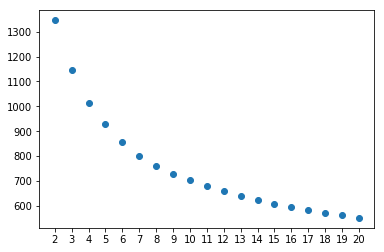

In [55]:
plt.scatter(list(range(2,21)), scores)
plt.xticks(range(2,21))
plt.show()

In [32]:
df_cluster = pd.merge(df_cluster, df[['SEQN','WTINT2YR']])

In [36]:
#df_cluster.iloc[:,1:16]

In [47]:
Xw = MinMaxScaler().fit_transform(df_cluster.iloc[:,1:16])
avgw = []
scoresw = []
for k in range(2,21):
    clusterer = KMeans(n_clusters=k, random_state=0)
    cluster_labels = clusterer.fit_predict(Xw, sample_weight=df_cluster['WTINT2YR'])
    avgw.append(silhouette_score(Xw, cluster_labels))
    scoresw.append(-clusterer.score(Xw))

In [48]:
avgw

[0.2759697388283031,
 0.2060852966667389,
 0.20948299449110439,
 0.18220682605952884,
 0.1867252473457431,
 0.16845331721256565,
 0.1647279944791961,
 0.16530839086093588,
 0.1586269317305405,
 0.1502634046652669,
 0.14811711343933218,
 0.14230540265110936,
 0.15016512315583877,
 0.1458474712017666,
 0.1387465629217646,
 0.14524675022833272,
 0.13810131092573089,
 0.13853761342221277,
 0.13090665878905297]

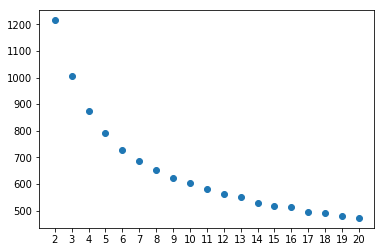

In [54]:
plt.scatter(list(range(2,21)), scoresw)
plt.xticks(range(2,21))
plt.show()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.3038732369217854
For n_clusters = 3 The average silhouette_score is : 0.2611975083673569
For n_clusters = 4 The average silhouette_score is : 0.2375530556061188
For n_clusters = 5 The average silhouette_score is : 0.21022337913092234
For n_clusters = 6 The average silhouette_score is : 0.19763111715865792
For n_clusters = 7 The average silhouette_score is : 0.19754437442782022
For n_clusters = 8 The average silhouette_score is : 0.1824335758885855
For n_clusters = 9 The average silhouette_score is : 0.18075601222459495
For n_clusters = 10 The average silhouette_score is : 0.17048035297304925


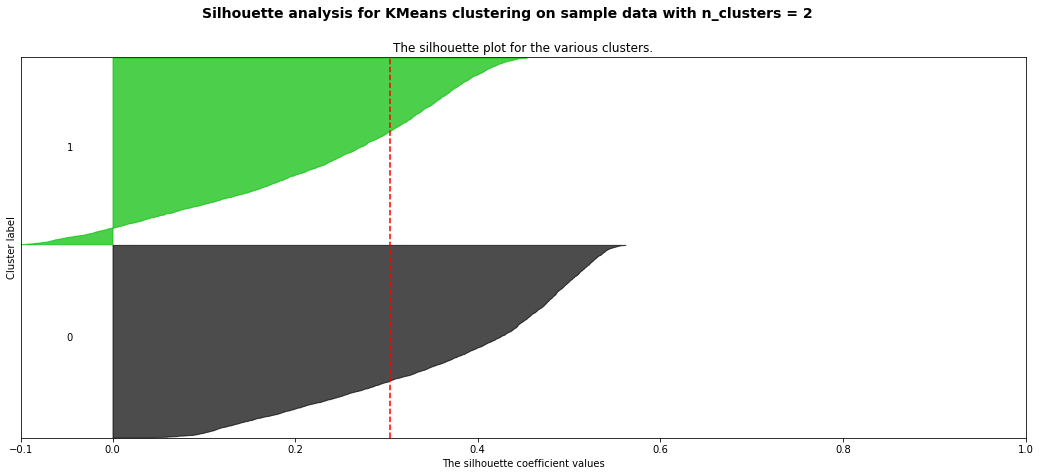

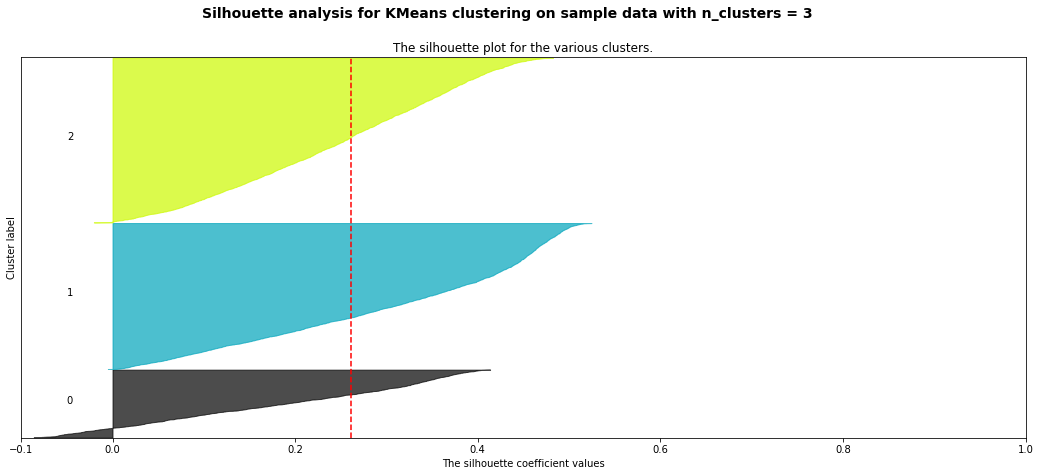

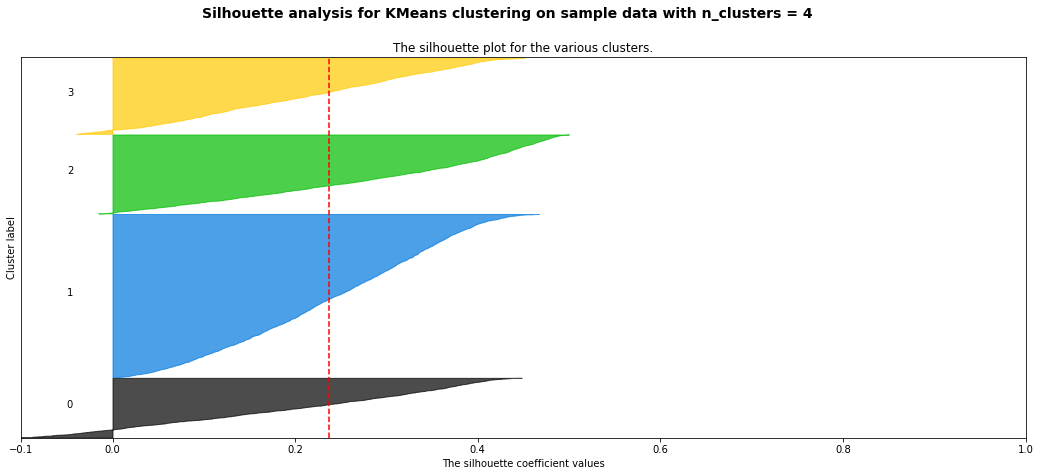

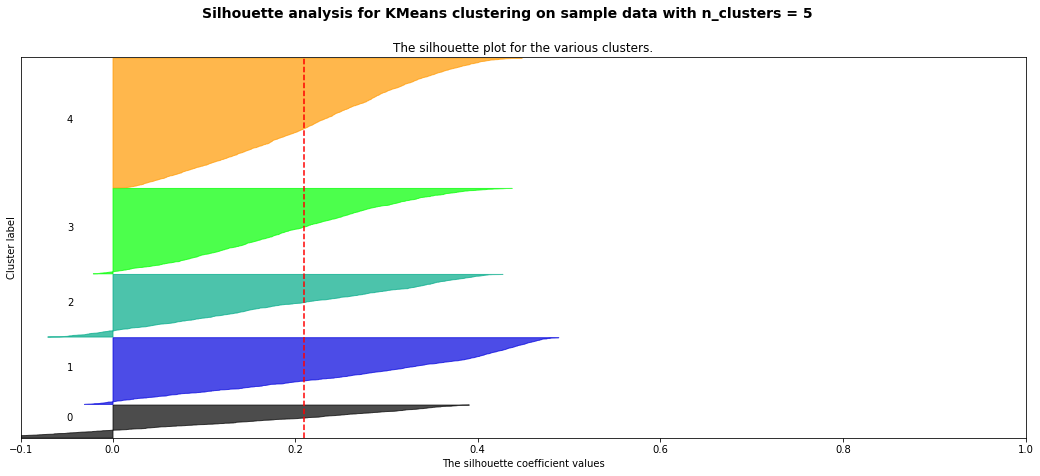

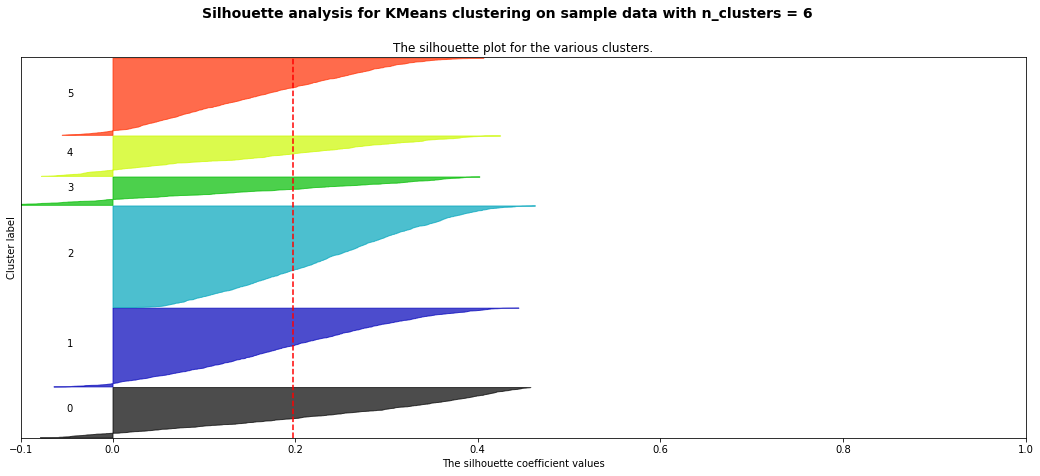

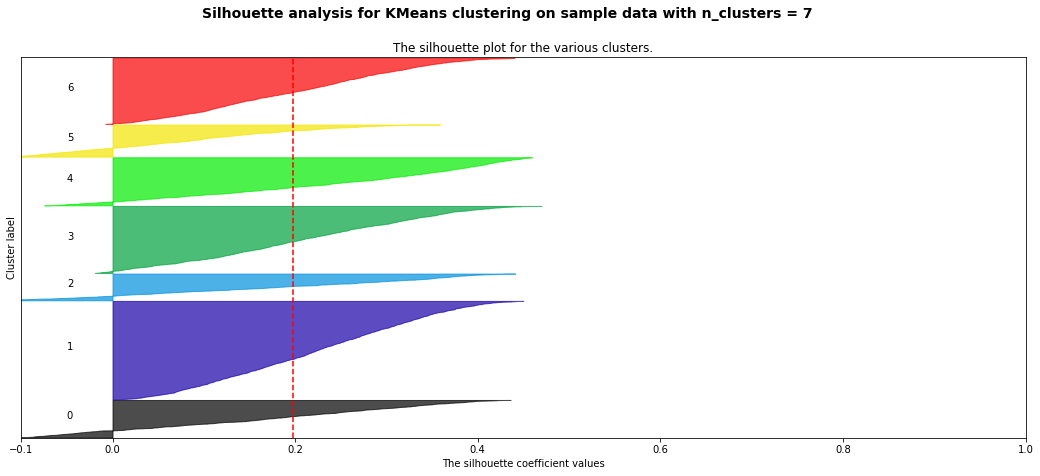

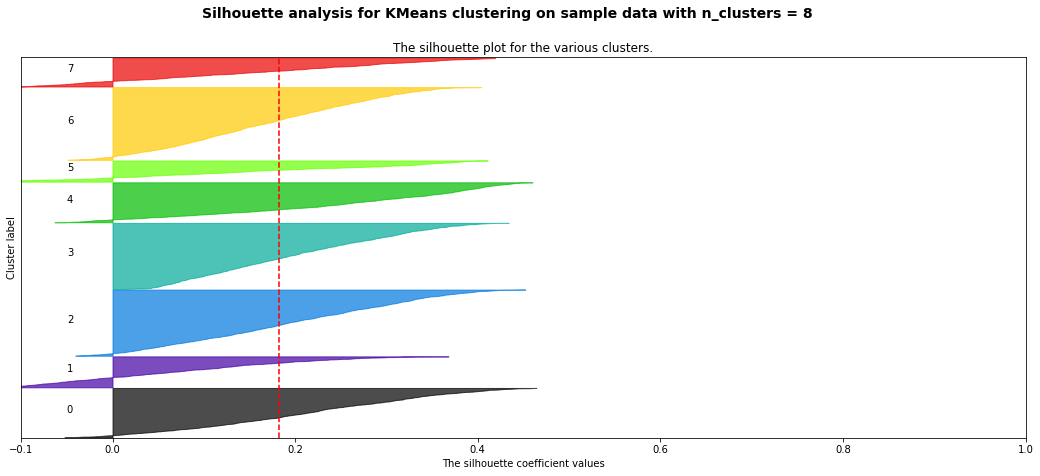

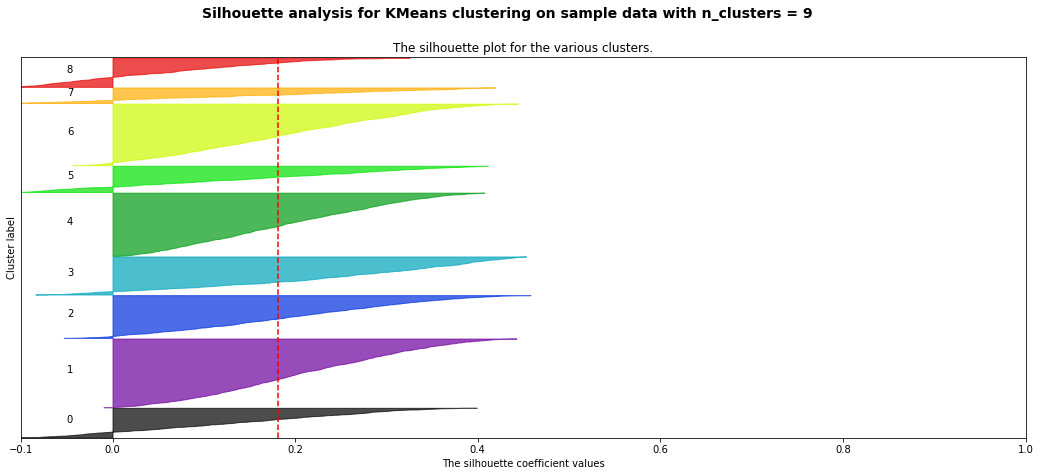

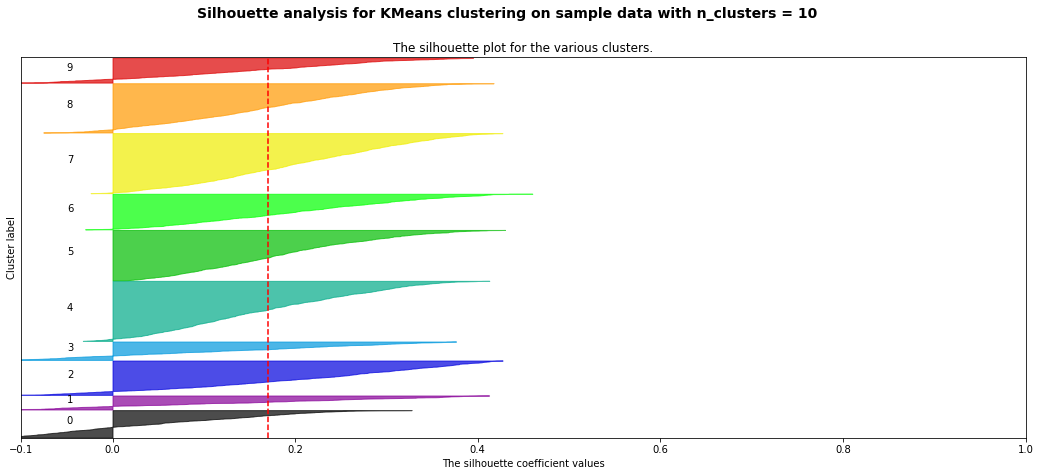

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

range_n_clusters = list(range(2,11))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()